# EE 449 HW-1

### Utils.py  
Necessary tools for grading and testing <br>
Provided by the course

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import os
import torch
from torchvision.utils import make_grid
from sklearn.datasets import make_blobs

def part1CreateDataset(train_samples=1000, val_samples=100, std=0.4):
    # CREATE A RANDOM DATASET

    centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]] #center of each class
    cluster_std = std # standard deviation of random gaussian samples

    x_train, y_train = make_blobs(n_samples=train_samples, centers=centers, n_features=2, cluster_std=cluster_std, shuffle=True)
    y_train[y_train==2] = 0 # make this an xor problem
    y_train[y_train==3] = 1 # make this an xor problem
    y_train = y_train.reshape(-1, 1) #vectorize the ground truth

    x_val, y_val = make_blobs(n_samples=val_samples, centers=centers, n_features=2, cluster_std=cluster_std, shuffle=True)
    y_val[y_val==2] = 0 # make this an xor problem
    y_val[y_val==3] = 1 # make this an xor problem
    y_val = y_val.reshape(-1, 1) # vectorize the ground truth

    return x_train, y_train, x_val, y_val

def part1PlotBoundary(X, y, nn):

    # Plot decision boundary
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['lightcoral', 'lightblue'], alpha=0.5)

    # Add contour lines
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdYlBu)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

# utility function to create performance plots for part 2
def part2Plots(out, nmax=64, save_dir='', filename=''):
    out = torch.tensor(out).reshape(-1,1,25,25)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((out.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    fig.savefig(os.path.join(save_dir, filename + '.png'))


# utility function to create performance plots for part 3
def part3Plots(results, save_dir='', filename='', show_plot=True):
    """plots multiple performance curves from multiple training results and
    saves the resultant plot as a png image

    Arguments:
    ----------

    results: list of dictionary objects, each corresponds to
    the result of a training and should have the following key-value
    items:

        'name': string, indicating the user-defined name of the training

        'loss_curve': list of floats, indicating the loss at each step

        'train_acc_curve': list of floats, indicating the the training accuracy at each step

        'val_acc_curve': list of floats indicating the the validation accuracy at each step

        'test_acc': float, indicating the best test accuracy

        'weights': (not used), 2-D float array, weights of the first hidden layer of the trained MLP

    save_dir: string, indicating the path to directory where the plot image is to be saved

    filename: string, indicating the name of the image file. Note that .png will be automatically
    appended to the filename.

    show_plot: bool, whether the figure is to be shown

    Example:
    --------

    visualizing the results of the training

    # assume the '*_value's are known

    >>> result_x = {'name': name_value, 'loss_curve': loss_curve_value,
                    'train_acc_curve': train_acc_curve_value,
                     'val_acc_curve': val_acc_curve_value,
                     'test_acc': test_acc_value}

    >>> results = [result_1, ..., result_x, ..., result_N]

    >>> part2Plots(results, save_dir=r'some\location\to\save', filename='part2Plots')

    """

    color_list = ['#0000ff', '#ff0000', '#d2691e', '#ff00ff', '#00ff00', '#000000', '#373788']
    style_list = ['-', '--']

    num_results = len(results)

    plot_curve_args = [{'c': color_list[k],
                        'linestyle': style_list[0],
                        'linewidth': 2} for k in range(num_results)]

    plot_point_args = [{'c': color_list[k],
                        'marker': 'o',
                        'markersize': 9,
                        'markerfacecolor':  color_list[k]} for k in range(num_results)]



    font_size = 18

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))


    # training loss
    ax = axes[0, 0]
    ax.set_title('training_loss', loc='left', fontsize=font_size)
    for result, args in zip(results, plot_curve_args):
        ax.plot(np.arange(1, len(result['loss_curve']) + 1), result['loss_curve'], label=result['name'], **args)
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='loss', fontsize=font_size)
        ax.tick_params(labelsize=12)

    # get lines for global legend
    lines = ax.get_lines()


    # training and validation accuracy
    ax = axes[0, 1]
    ax.set_title('train_and_val_accuracies', loc='right', fontsize=font_size)
    for result, args in zip(results, plot_curve_args):
        ax.plot(np.arange(1, len(result['train_acc_curve']) + 1), result['train_acc_curve'], label=result['name'],
                **args)
        args['linestyle'] = style_list[1]
        ax.plot(np.arange(1, len(result['val_acc_curve']) + 1), result['val_acc_curve'], label=result['name'],
                **args)
        args['linestyle'] = style_list[0]
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='acc.', fontsize=font_size)
        ax.tick_params(labelsize=12)

        legend_elements = [Line2D([0], [0], color='k', linestyle=style_list[0], lw=2, label='train.'),
                           Line2D([0], [0], color='k', linestyle=style_list[1], lw=2, label='val.')]

        ax.legend(fontsize=12, loc='best', handles=legend_elements)

    # validation vs training accuracy
    ax = axes[1, 1]
    ax.set_title('validation_vs_training_accuracy', loc='right', fontsize=font_size)
    for result, args in zip(results, plot_curve_args):
        ax.plot(result['train_acc_curve'], result['val_acc_curve'], label=result['name'], **args)
        ax.set_xlabel(xlabel='training', fontsize=font_size)
        ax.set_ylabel(ylabel='validation', fontsize=font_size)
        ax.tick_params(labelsize=12)



    # test vs training accuracy
    ax = axes[1, 0]
    ax.set_title('test_vs_training_accuracy', loc='left', fontsize=font_size)
    for result, args in zip(results, plot_point_args):
        train_acc = result['train_acc_curve'][-1]
        test_acc = result['test_acc']
        ax.plot(train_acc, test_acc, label=result['name'],  **args)
        ax.set_xlabel(xlabel='training', fontsize=font_size)
        ax.set_ylabel(ylabel='test', fontsize=font_size)
        ax.tick_params(labelsize=12)

    # global legend
    fig.legend(labels=[line._label for line in lines],
               ncol=3, loc="upper center", fontsize=font_size,
               handles=lines)

    if show_plot:
        plt.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to create performance plots for part 4
def part4Plots(results, save_dir='', filename='', show_plot=True):
    """plots multiple performance curves from multiple training results and
    saves the resultant plot as a png image

    Arguments:
    ----------

    results: list of dictionary objects, each corresponds to
    the result of a training and should have the following key-value
    items:

        'name': string, indicating the user-defined name of the training

        'relu_loss_curve': list of floats, indicating the loss at each step

        'sigmoid_loss_curve': list of floats, indicating the loss at each step

        'relu_grad_curve': list of floats, indicating the gradient magnitude at each step

        'sigmoid_grad_curve': list of floats, indicating the gradient magnitude at each step

    save_dir: string, indicating the path to directory where the plot image is to be saved

    filename: string, indicating the name of the image file. Note that .png will be automatically
    appended to the filename.

    show_plot: bool, whether the figure is to be shown

    Example:
    --------

    visualizing the results of the training

    # assume the '*_value's are known

    >>> result_x = {'name': name_value, 'relu_loss_curve': relu_loss_curve_value,
                    'sigmoid_loss_curve': sigmoid_loss_curve_value,
                     'relu_grad_curve': relu_grad_curve_value}

    >>> results = [result_1, ..., result_x, ..., result_N]

    >>> part3Plots(results, save_dir=r'some\location\to\save', filename='part3Plots')

    """

    color_list = ['#0000ff', '#ff0000', '#d2691e', '#ff00ff', '#00ff00', '#000000', '#373788']
    style_list = ['-', '--']

    num_results = len(results)

    relu_curve_args = [{'c': color_list[k],
                        'linestyle': style_list[0],
                        'linewidth': 2} for k in range(num_results)]

    sigmoid_curve_args = [{'c': color_list[k],
                        'linestyle': style_list[1],
                        'linewidth': 2} for k in range(num_results)]



    font_size = 18

    fig, axes = plt.subplots(1, 2, figsize=(16, 12))

    legend_elements = [Line2D([0], [0], color='k', linestyle=style_list[0], lw=2, label='ReLU'),
                       Line2D([0], [0], color='k', linestyle=style_list[1], lw=2, label='Sigmoid')]

    # training loss
    ax = axes[0]
    ax.set_title('training_losses', loc='left', fontsize=font_size)
    for result, relu_args, sigmoid_args in zip(results, relu_curve_args, sigmoid_curve_args):
        ax.plot(np.arange(1, len(result['relu_loss_curve']) + 1),
                result['relu_loss_curve'], label=result['name'], **relu_args)
        ax.plot(np.arange(1, len(result['sigmoid_loss_curve']) + 1),
                result['sigmoid_loss_curve'], label=result['name'], **sigmoid_args)
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='loss', fontsize=font_size)
        ax.tick_params(labelsize=12)
        ax.legend(loc='upper left', fontsize=12, handles=legend_elements)

    # gradient magnitude
    ax = axes[1]
    ax.set_title('gradient_magnitudes', loc='right', fontsize=font_size)
    for result, relu_args, sigmoid_args in zip(results, relu_curve_args, sigmoid_curve_args):
        ax.plot(np.arange(1, len(result['relu_grad_curve']) + 1),
                result['relu_grad_curve'], label=result['name'], **relu_args)
        ax.plot(np.arange(1, len(result['sigmoid_grad_curve']) + 1),
                result['sigmoid_grad_curve'], label=result['name'], **sigmoid_args)
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='|grad_loss|', fontsize=font_size)
        ax.tick_params(labelsize=12)
        ax.legend(loc='upper right', fontsize=12, handles=legend_elements)

    # global legend
    lines = ax.get_lines()[::2]
    fig.legend(labels=[line._label for line in lines],
               ncol=3, loc="upper center", fontsize=font_size,
               handles=lines)

    if show_plot:
        plt.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to create performance plots for part 5
def part5Plots(result, save_dir='', filename='', show_plot=True):
    """plots multiple performance curves from multiple training results and
    saves the resultant plot as a png image

    Arguments:
    ----------

    result: dictionary object, each corresponds to
    the result of a training and should have the following key-value
    items:

        'name': string, indicating the user-defined name of the training

        'loss_curve_1': list of floats, indicating the loss with .1 lr at each step

        'loss_curve_01': list of floats, indicating the loss with .01 lr at each step

        'loss_curve_001': list of floats, indicating the loss with .001 lr at each step

        'val_acc_curve_1': list of floats, indicating the val acc with .1 lr at each step

        'val_acc_curve_01': list of floats, indicating the val acc with .01 lr at each step

        'val_acc_curve_001': list of floats, indicating the val acc with .001 lr at each step

    save_dir: string, indicating the path to directory where the plot image is to be saved

    filename: string, indicating the name of the image file. Note that .png will be automatically
    appended to the filename.

    show_plot: bool, whether the figure is to be shown

    Example:
    --------

    visualizing the results of the training

    # assume the '*_value's are known

    >>> result = {'name': name_value, 'loss_curve_1': loss_curve_1_value, ...}

    >>> part4Plots(result, save_dir=r'some\location\to\save', filename='part4Plots')

    """

    if isinstance(result, (list, tuple)):
        result = result[0]

    color_list = ['#0000ff', '#ff0000', '#d2691e', '#ff00ff', '#00ff00', '#000000', '#373788']
    style_list = ['-', '--']

    num_curves = 3

    plot_args = [{'c': color_list[k],
                        'linestyle': style_list[0],
                        'linewidth': 2} for k in range(num_curves)]


    key_suffixes = ['1', '01', '001']


    font_size = 18

    fig, axes = plt.subplots(1, 2, figsize=(16, 12))

    fig.suptitle('training of <%s> with different learning rates'%result['name'],
                 fontsize=font_size, y=0.025)

    # training loss and validation accuracy
    axes[0].set_title('training_losses', loc='left', fontsize=font_size)
    axes[1].set_title('validation_accuracies', loc='right', fontsize=font_size)
    for key_suffix, plot_args in zip(key_suffixes, plot_args):

        loss_curve = result['loss_curve_' + key_suffix]
        acc_curve = result['val_acc_curve_' + key_suffix]
        label = 'lr=0.%s'%key_suffix

        axes[0].plot(np.arange(1, len(loss_curve) + 1),
                     loss_curve, label=label, **plot_args)
        axes[0].set_xlabel(xlabel='step', fontsize=font_size)
        axes[0].set_ylabel(ylabel='loss', fontsize=font_size)
        axes[0].tick_params(labelsize=12)

        axes[1].plot(np.arange(1, len(acc_curve) + 1),
                     acc_curve, label=label, **plot_args)
        axes[1].set_xlabel(xlabel='step', fontsize=font_size)
        axes[1].set_ylabel(ylabel='accuracy', fontsize=font_size)
        axes[1].tick_params(labelsize=12)


    # global legend
    lines = axes[0].get_lines()
    fig.legend(labels=[line._label for line in lines],
               ncol=3, loc="upper center", fontsize=font_size,
               handles=lines)

    if show_plot:
        plt.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to visualize learned weights
def visualizeWeights(weights, save_dir, filename='weigths'):
    '''visualizes the weights and saves the visualization as a png image

    Arguments:
    ----------
    weights : numpy array of size 784 x D where D is the number of weights
    save_dir : string, path to directory to save the image
    filename : strint, name of the saved image (.png is to be appended automatically)

    Example:
    --------
    visualizing weights at the input layer of a keras.Model object

    # assume classifier is an instance of keras.Model

    >>> weights = classifier.trainable_weights[0].numpy()

    >>> visualizeWeights(weights, save_dir='some\location\to\save', filename='input_weights')
    '''

    weights = weights.T

    num_weights = weights.shape[-1]

    dim = np.ceil(np.sqrt(num_weights)).astype(int)

    fig, axes = plt.subplots(dim, dim)

    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = weights.min(), weights.max()
    for coef, ax in zip(weights.T, axes[:num_weights].ravel()):
        coef = np.squeeze(coef).T if len(weights.shape) > 2 else coef.reshape(28, 28)
        ax.matshow(coef, cmap=plt.cm.gray, vmin=.5 * vmin,
                   vmax=.5 * vmax)

        ax.set_xticks(())
        ax.set_yticks(())

    fig.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to visualize dataset
def visualizeDataset(images, labels, save_dir, filename='dataset', num_samples_per_class=8):

    num_classes = np.max(labels) + 1

    fig, axes = plt.subplots(num_classes, num_samples_per_class)

    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    for r in range(num_classes):
        sample_indcs = np.where(labels == r)[0][:num_samples_per_class]
        for n in range(num_samples_per_class):
            axes[r, n].matshow(images[sample_indcs[n]].reshape(28, 28),
                               cmap=plt.cm.gray)
            axes[r, n].set_xticks(())
            axes[r, n].set_yticks(())

    fig.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))


### 1.1 Preliminaries
function definitions for activation functions

In [4]:
x = np.linspace(-5, 5, 100)

y1 = (np.exp(2*x)-1)/(np.exp(2*x)+1) #Tanh function
y2 = 1/(1+np.exp(-x)) #Sigmoid function
y3 = np.maximum(0,x) #ReLU function
dy1 = (4*np.exp(2*x))/np.square((np.exp(2*x)+1)) #Derivative of tanh function
dy2 = (np.exp(-x))/np.square((np.exp(-x)+1))#Derivative of sigmoid function
#dy2 = y2*(1-y2) #An alternative for sigmoid derivative
dy3 = np.where(x > 0, 1, 0) #Derivative of ReLU function

plots

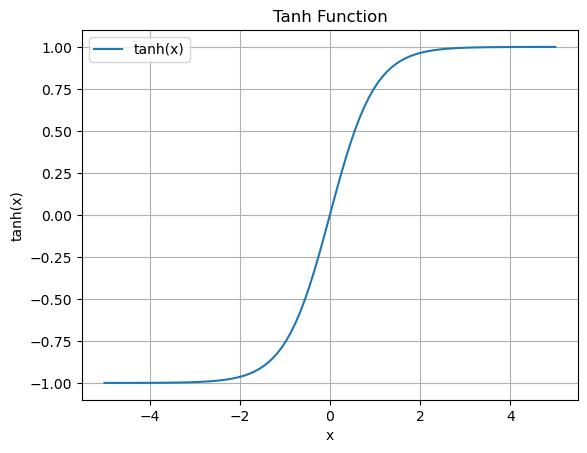

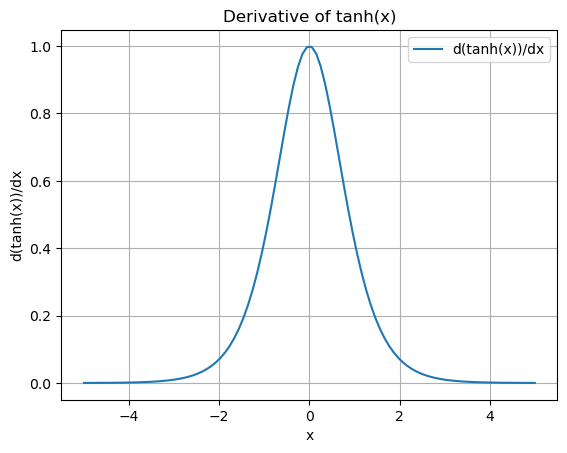

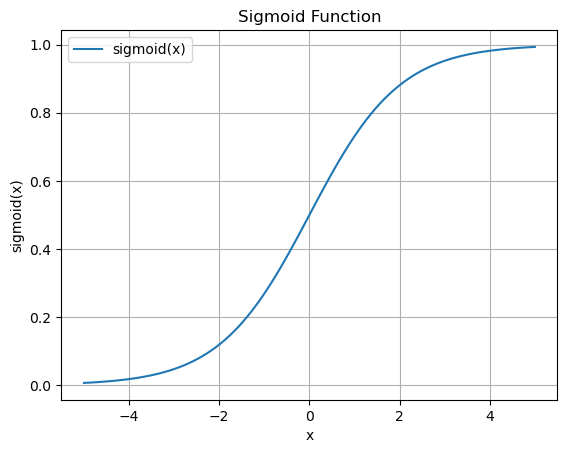

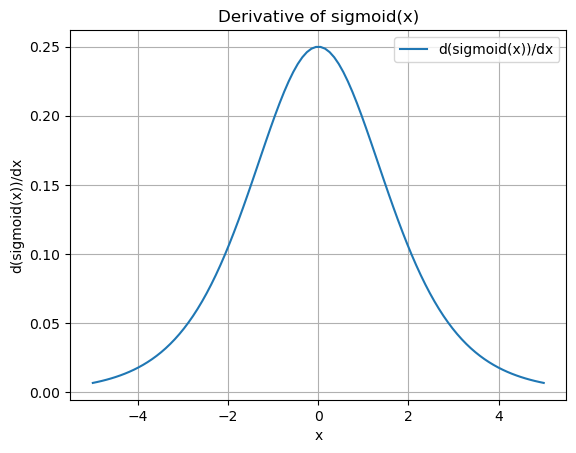

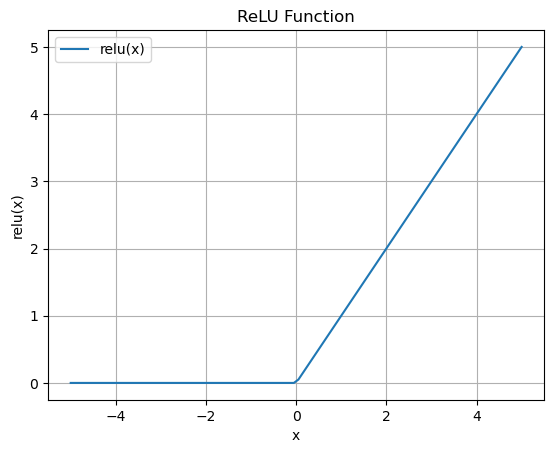

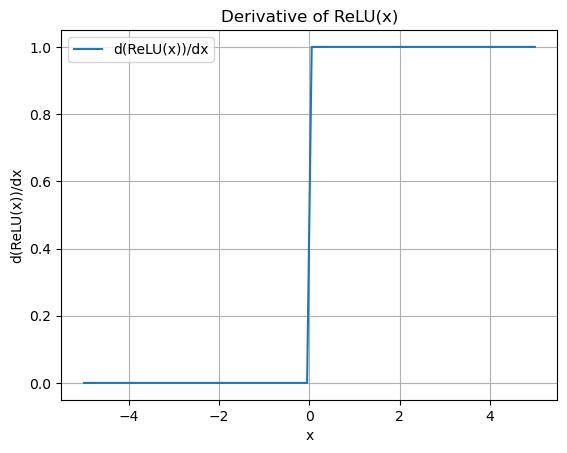

In [5]:
plt.plot(x, y1, label='tanh(x)') # tanh function
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, dy1, label='d(tanh(x))/dx') # derivative of tanh function
plt.xlabel('x')
plt.ylabel('d(tanh(x))/dx')
plt.title('Derivative of tanh(x)')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, y2, label='sigmoid(x)') # sigmoid function
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, dy2, label='d(sigmoid(x))/dx') # derivative of sigmoid function
plt.xlabel('x')
plt.ylabel('d(sigmoid(x))/dx')
plt.title('Derivative of sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, y3, label='relu(x)') # ReLU function
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('ReLU Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, dy3, label='d(ReLU(x))/dx') # derivative of ReLU function
plt.xlabel('x')
plt.ylabel('d(ReLU(x))/dx')
plt.title('Derivative of ReLU(x)')
plt.grid(True)
plt.legend()
plt.show()

### 1.2 Implementation

MLP class definition

In [6]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x): #sigmoid
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x): #derivative of sigmoid
        return (self.sigmoid(x) * (1 - self.sigmoid(x)))

    def tanh(self, x): #tanh
        return (np.exp(2*x)-1)/(np.exp(2*x)+1)
    def tanh_derivative(self, x): #derivative of tanh
        return (4*np.exp(2*x))/np.square((np.exp(2*x)+1))

    def ReLU(self, x): #ReLU
        return np.maximum(0,x)
    def ReLU_derivative(self, x): #derivative of ReLU
        return np.where(x > 0, 1, 0)

    def forward(self, inputs):
        # Forward pass through the network
        self.input = self.sigmoid(inputs)

        self.pre_activation_hidden = np.dot(self.input, self.weights_input_hidden) + self.bias_hidden #pre-activated values of hidden nodes for error calculation
        self.hidden_output = self.sigmoid(self.pre_activation_hidden) #output of hidden nodes

        self.pre_activation_output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output #pre-activated values of output nodes for error calculation
        self.output = (self.sigmoid(self.pre_activation_output) > 0.5) #output value rounded to 1 or 0 in order to classify output
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        self.input = self.sigmoid(inputs)

        output_error = (targets - self.output) * self.sigmoid_derivative(self.pre_activation_output)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.pre_activation_hidden)

        # Compute gradients
        output_delta = learning_rate * np.dot(self.hidden_output.T, output_error)
        hidden_delta = learning_rate * np.dot(self.input.T, hidden_error)

        # Update weights and biases
        self.weights_hidden_output += output_delta
        self.bias_output += learning_rate * np.mean(output_error, axis=0, keepdims=True)
        self.weights_input_hidden += hidden_delta
        self.bias_hidden += learning_rate * np.mean(hidden_error, axis=0, keepdims=True)


XOR dataset

In [7]:
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

Test the network

Epoch 0: Loss = 0.5
Epoch 1000: Loss = 0.496
Epoch 2000: Loss = 0.469
Epoch 3000: Loss = 0.414
Epoch 4000: Loss = 0.032
Epoch 5000: Loss = 0.027
Epoch 6000: Loss = 0.023
Epoch 7000: Loss = 0.02
Epoch 8000: Loss = 0.018
Epoch 9000: Loss = 0.019
98.0 % of test examples classified correctly.


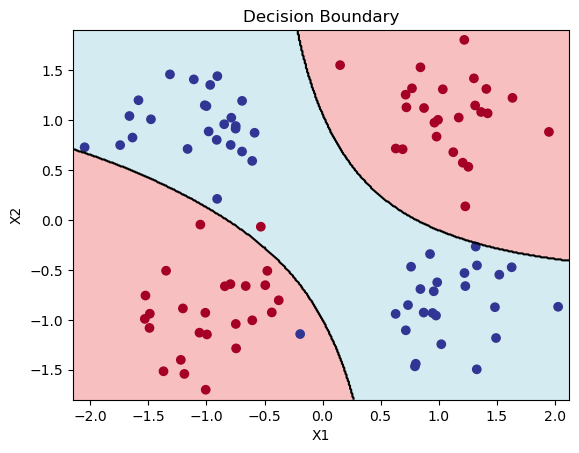

In [8]:
  # Define neural network parameters
  input_size = 2
  hidden_size = 4
  output_size = 1
  learning_rate = 0.001

  # Create neural network
  nn = MLP(input_size, hidden_size, output_size)

  # Train the neural network
  for epoch in range(10000):
     # Forward propagation
     output = nn.forward(x_train)
     # Backpropagation
     nn.backward(x_train, y_train, learning_rate)
     # Print the loss (MSE) every 1000 epochs
     if epoch % 1000 == 0:
        loss = np.mean((y_train - nn.forward(x_train)) ** 2)
        print(f'Epoch {epoch}: Loss = {loss}')

  # Test the trained neural network
  y_predict = nn.forward(x_val)
  print(f"{np.mean(y_predict==y_val)*100} % of test examples classified correctly.")

  part1PlotBoundary(x_val, y_val, nn)

### 2.1 Experimental Work

definition of my_conv2d function

In [9]:
def my_conv2d(input, kernel):
    # Initialize output with zeros
    output = np.zeros((input.shape[0], kernel.shape[0], input.shape[2] - kernel.shape[2] + 1, input.shape[3] - kernel.shape[3] + 1))

    # Perform convolution
    for b in range(input.shape[0]):
        for oc in range(kernel.shape[0]):
            for oh in range(output.shape[2]):
                for ow in range(output.shape[3]):
                    # Extract input region
                    input_region = input[b, :, oh:oh + kernel.shape[2], ow:ow + kernel.shape[3]]

                    # Perform convolution for each input channel
                    for ic in range(input.shape[1]):
                        output[b, oc, oh, ow] += np.sum(input_region[:, ic] * kernel[oc, ic])

    return output

pytorch control

In [10]:
import torch
print(torch.__version__)

2.2.2+cu121


implementation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


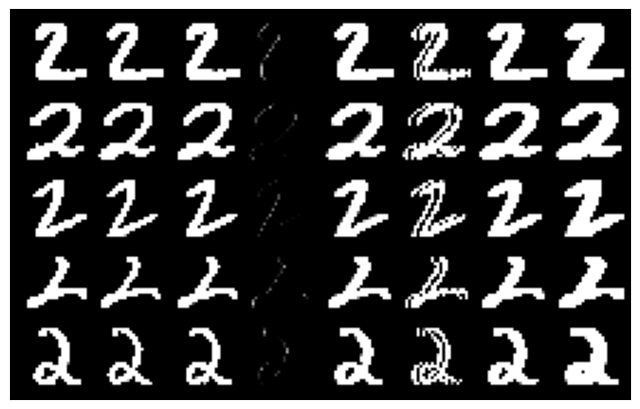

In [11]:
import numpy as np
# input shape: [batch size, input_channels, input_height, input_width]
input=np.load("samples_2.npy")
# input shape: [output_channels, input_channels, filter_height, filter width]
kernel=np.load("kernel.npy")
out = my_conv2d(input, kernel)

part2Plots(out)

### 3.0 Preliminaries

load data

In [12]:
import torchvision
# training set
train_data = torchvision.datasets.FashionMNIST('./data', train = True, download = True, transform = torchvision.transforms.ToTensor())
# test set
test_data = torchvision.datasets.FashionMNIST('./data', train = False, transform = torchvision.transforms.ToTensor())

use GPU acceleration

In [13]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


Data loader 

In [14]:
batch_size = 50

# Split the training data into training and validation sets
validation_split = 0.1
shuffle_dataset = True
random_seed = 31

# Creating data indices for training and validation splits
dataset_size = len(train_data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

# Shuffle the dataset if required
if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)

# Splitting the dataset into training and validation sets
#train_indices, val_indices = indices[split:], indices[:split]

# Ensure that the number of samples per class is equal in both training and validation sets
class_counts = {label.item(): 0 for label in train_data.targets.unique()}
train_indices_balanced = []
val_indices_balanced = []

for idx in indices:
    label = train_data.targets[idx].item()
    if class_counts[label] < split // 10:
        val_indices_balanced.append(idx)
        class_counts[label] += 1
    else:
        train_indices_balanced.append(idx)

# Define samplers for training and validation sets
train_sampler = SubsetRandomSampler(train_indices_balanced)
val_sampler = SubsetRandomSampler(val_indices_balanced)

# Define dataloaders for training, validation, and testing sets
train_generator = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
val_generator = DataLoader(train_data, batch_size=batch_size, sampler=val_sampler)
test_generator = DataLoader(test_data, batch_size=batch_size)

for X, y in test_generator:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([50, 1, 28, 28])
Shape of y: torch.Size([50]) torch.int64


class, training and test defintions

In [16]:

# example mlp classifier
class FullyConnected(torch.nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(FullyConnected, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    return output

def train(dataloader, model, loss_fn, optimizer, valloader):
    size = int(len(dataloader.dataset)*0.9)


    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        model.train()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        num_batches = len(dataloader)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            test_loss, correct = 0, 0
            loss, current = loss.item(), (batch) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return correct
def val_test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)*0.1

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).sum().item()  # Calculate correct predictions
    test_loss /= num_batches
    accuracy = correct / size  # Calculate accuracy
    print(f"Validation error: \n Validation accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return accuracy

Models

In [17]:
#params_784x128 = model.fc1.weight.data.numpy()

model = FullyConnected(784,128,10).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
print(model)

FullyConnected(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


Training

In [18]:
epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_generator, model, loss, optimizer, val_generator)
    test(test_generator, model, loss)
    val_test(val_generator, model, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.341391  [    0/54000]
loss: 0.737371  [ 5000/54000]
loss: 0.438621  [10000/54000]
loss: 0.491455  [15000/54000]
loss: 0.456111  [20000/54000]
loss: 0.657372  [25000/54000]
loss: 0.637946  [30000/54000]
loss: 0.434988  [35000/54000]
loss: 0.528940  [40000/54000]
loss: 0.382268  [45000/54000]
loss: 0.435812  [50000/54000]
Test Error: 
 Accuracy: 83.4%, Avg loss: 0.466287 

Validation error: 
 Validation accuracy: 84.3%, Avg loss: 0.433397 

Epoch 2
-------------------------------
loss: 0.485861  [    0/54000]
loss: 0.565281  [ 5000/54000]
loss: 0.316841  [10000/54000]
loss: 0.547659  [15000/54000]
loss: 0.744602  [20000/54000]
loss: 0.562390  [25000/54000]
loss: 0.334501  [30000/54000]
loss: 0.313428  [35000/54000]
loss: 0.351711  [40000/54000]
loss: 0.379375  [45000/54000]
loss: 0.449191  [50000/54000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.431823 

Validation error: 
 Validation accuracy: 86.2%, Avg loss: 0.396527 

Done!


### 3.1 Experimental Work

train, test and validation test methods with tranining and validation accuracy recording

In [21]:
def train(dataloader, model, loss_fn, optimizer, valloader, training_loss, training_accuracy, validation_accuracy):
    size = int(len(dataloader.dataset)*0.9)


    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        model.train()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        num_batches = len(dataloader)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            test_loss, correct = 0, 0
            loss, current = loss.item(), (batch) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct /= batch_size
            accuracy = correct

            training_loss.append(loss)
            training_accuracy.append(accuracy)
            validation_accuracy.append(val_test(valloader, model, loss_fn))


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return correct
def val_test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)*0.1

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).sum().item()  # Calculate correct predictions
    test_loss /= num_batches
    accuracy = correct / size  # Calculate accuracy
    print(f"Validation error: \n Validation accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return accuracy

Architectures to be tested

In [41]:
class mlp_1(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    num_classes = 10
    super(mlp_1, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    relu = self.relu(hidden) #ReLu
    output = self.fc2(relu) #Prediction layer
    return output

class mlp_2(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    hidden2_size = 64
    num_classes = 10
    super(mlp_2, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, hidden2_size)
    self.fc3 = torch.nn.Linear(hidden2_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    relu = self.relu(hidden) #ReLu
    hidden2 = self.fc2(relu) #FC-64
    output = self.fc3(hidden2) #Prediction layer
    return output

class cnn_3(torch.nn.Module):
  def __init__(self):
    super(cnn_3, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(16, 8, (5, 5), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn3(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_4(torch.nn.Module):
  def __init__(self):
    super(cnn_4, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn4 = torch.nn.Conv2d(16, 16, (5, 5), stride=1, padding='valid')
    self.relu = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.cnn3(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn4(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_5(torch.nn.Module):
  def __init__(self):
    super(cnn_5, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn3 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn4 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn5 = torch.nn.Conv2d(16, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn6 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(8*3*3, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.cnn3(x)
    x = self.relu(x)
    x = self.cnn4(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn5(x)
    x = self.relu(x)
    x = self.cnn6(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

training

In [42]:
model = mlp_2().to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
print(model, "\n")

mlp_2(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
) 



In [43]:
training_loss = []
training_accuracy = []
validation_accuracy = []

epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_generator, model, loss, optimizer, val_generator, training_loss, training_accuracy, validation_accuracy)
    test_accuracy = test(test_generator, model, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298943  [    0/54000]
Validation error: 
 Validation accuracy: 13.0%, Avg loss: 2.230062 

loss: 1.182368  [  500/54000]
Validation error: 
 Validation accuracy: 62.4%, Avg loss: 0.941799 

loss: 0.977783  [ 1000/54000]
Validation error: 
 Validation accuracy: 63.7%, Avg loss: 1.186232 

loss: 0.979819  [ 1500/54000]
Validation error: 
 Validation accuracy: 67.9%, Avg loss: 0.854758 

loss: 0.740548  [ 2000/54000]
Validation error: 
 Validation accuracy: 71.5%, Avg loss: 0.708879 

loss: 0.757312  [ 2500/54000]
Validation error: 
 Validation accuracy: 72.7%, Avg loss: 0.746973 

loss: 0.787758  [ 3000/54000]
Validation error: 
 Validation accuracy: 74.2%, Avg loss: 0.689843 

loss: 0.883156  [ 3500/54000]
Validation error: 
 Validation accuracy: 71.8%, Avg loss: 0.721453 

loss: 0.600889  [ 4000/54000]
Validation error: 
 Validation accuracy: 75.8%, Avg loss: 0.665732 

loss: 0.687809  [ 4500/54000]
Validation error: 
 Validation accuracy

Storing experimental data

In [48]:
params = model.fc1.weight.data.cpu().numpy()

#dictionary definition
mlp_2 = {
    "name": 'mlp_2',
    "loss_curve": training_loss,
    "train_acc_curve": training_accuracy,
    "val_acc_curve": validation_accuracy,
    "test_acc": test_accuracy,
    "weights": params,
}

Visualizations (pathways are written for google colab)

In [ ]:
import pickle

filename = f"part3_{cnn_4['name']}.pkl"
with open(filename, 'wb') as f:
    pickle.dump(cnn_4, f)

In [ ]:
with open('part3_mlp_1.pkl', 'rb') as handle:
    mlp_1 = pickle.load(handle)
with open('part3_mlp_2.pkl', 'rb') as handle:
    mlp_2 = pickle.load(handle)
with open('part3_cnn_3.pkl', 'rb') as handle:
    cnn_3 = pickle.load(handle)
with open('part3_cnn_4.pkl', 'rb') as handle:
    cnn_4 = pickle.load(handle)
with open('part3_cnn_5.pkl', 'rb') as handle:
    cnn_5 = pickle.load(handle)

In [ ]:
results = [mlp_1, mlp_2, cnn_3, cnn_4, cnn_5] # Other archtiectures too must be run for comparison

part3Plots(results, save_dir='/content', filename='part3_comparison', show_plot = True)

C:\Users\soysa\AppData\Local\Temp\ipykernel_37632\1924329070.py:438: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content\\weigths.png'

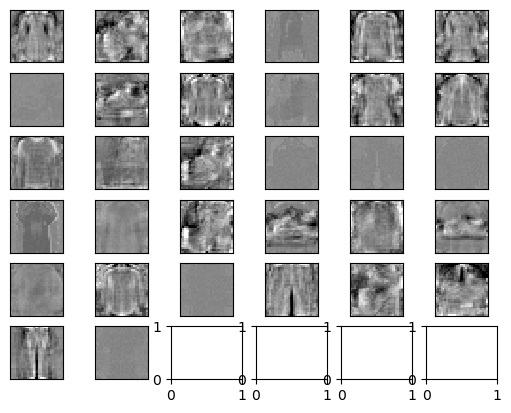

In [52]:
params = mlp_2.get('weights')

visualizeWeights(params, "/content", filename='weigths')

## 4.0 Experimenting Activation Functions

### 4.1 Experimental Work

Architectures

In [67]:
class mlp_1(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    num_classes = 10
    super(mlp_1, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    relu = self.relu(hidden) #ReLu
    output = self.fc2(relu) #Prediction layer
    return output

class mlp_1_s(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    num_classes = 10
    super(mlp_1_s, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    sigmoid = self.sigmoid(hidden) #ReLu
    output = self.fc2(sigmoid) #Prediction layer
    return output

class mlp_2(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    hidden2_size = 64
    num_classes = 10
    super(mlp_2, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, hidden2_size)
    self.fc3 = torch.nn.Linear(hidden2_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    relu = self.relu(hidden) #ReLu
    hidden2 = self.fc2(relu) #FC-64
    output = self.fc3(hidden2) #Prediction layer
    return output

class mlp_2_s(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    hidden2_size = 64
    num_classes = 10
    super(mlp_2_s, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, hidden2_size)
    self.fc3 = torch.nn.Linear(hidden2_size, num_classes)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    sigmoid = self.sigmoid(hidden) #ReLu
    hidden2 = self.fc2(sigmoid) #FC-64
    output = self.fc3(hidden2) #Prediction layer
    return output

class cnn_3(torch.nn.Module):
  def __init__(self):
    super(cnn_3, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(16, 8, (5, 5), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn3(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_3_s(torch.nn.Module):
  def __init__(self):
    super(cnn_3_s, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn2 = torch.nn.Conv2d(16, 8, (5, 5), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)
  def forward(self, x):
    x = self.cnn1(x)
    x = self.sigmoid(x)
    x = self.cnn2(x)
    x = self.sigmoid(x)
    x = self.pool1(x)
    x = self.cnn3(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_4(torch.nn.Module):
  def __init__(self):
    super(cnn_4, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn4 = torch.nn.Conv2d(16, 16, (5, 5), stride=1, padding='valid')
    self.relu = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.cnn3(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn4(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_4_s(torch.nn.Module):
  def __init__(self):
    super(cnn_4_s, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn2 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.sigmoid = torch.nn.Sigmoid()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn4 = torch.nn.Conv2d(16, 16, (5, 5), stride=1, padding='valid')
    self.sigmoid = torch.nn.Sigmoid()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.sigmoid(x)
    x = self.cnn2(x)
    x = self.sigmoid(x)
    x = self.cnn3(x)
    x = self.sigmoid(x)
    x = self.pool1(x)
    x = self.cnn4(x)
    x = self.sigmoid(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_5(torch.nn.Module):
  def __init__(self):
    super(cnn_5, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn3 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn4 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn5 = torch.nn.Conv2d(16, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn6 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(8*3*3, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.cnn3(x)
    x = self.relu(x)
    x = self.cnn4(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn5(x)
    x = self.relu(x)
    x = self.cnn6(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_5_s(torch.nn.Module):
  def __init__(self):
    super(cnn_5_s, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 8, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn2 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn3 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn4 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn5 = torch.nn.Conv2d(16, 16, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.cnn6 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.sigmoid = torch.nn.Sigmoid()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(8*3*3, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.sigmoid(x)
    x = self.cnn2(x)
    x = self.sigmoid(x)
    x = self.cnn3(x)
    x = self.sigmoid(x)
    x = self.cnn4(x)
    x = self.sigmoid(x)
    x = self.pool1(x)
    x = self.cnn5(x)
    x = self.sigmoid(x)
    x = self.cnn6(x)
    x = self.sigmoid(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

Training

In [68]:
model = cnn_3().to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer_4 = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.0)
print(model, "\n")

cnn_3(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (relu): ReLU()
  (cnn2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=valid)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=valid)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=144, out_features=10, bias=True)
) 



In [71]:
model_s = cnn_3_s().to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer_4 = torch.optim.SGD(model_s.parameters(), lr = 0.01, momentum = 0.0)
print(model_s, "\n")

cnn_3_s(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (sigmoid): Sigmoid()
  (cnn2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=valid)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=valid)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=144, out_features=10, bias=True)
) 



Train modified for data recording activation function gradient

In [69]:
def train(dataloader, model, loss_fn, optimizer, valloader, activation_loss, activation_grad):
    size = int(len(dataloader.dataset)*0.9)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()


        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            activation_loss.append(loss)
            first_layer_weights_grad = model.fc1.weight.grad
            grad_magnitude = np.linalg.norm(first_layer_weights_grad.cpu().detach().numpy())
            activation_grad.append(grad_magnitude)

            val_test(valloader, model, loss_fn)
        optimizer_4.zero_grad()

ReLU Training

In [70]:
relu_loss_curve = []
relu_grad_curve = []

epochs = 2
for t in range(epochs): #trains ReLU
    print(f"Epoch {t+1}\n-------------------------------")
    optimizer_4.zero_grad()
    train(train_generator, model, loss, optimizer_4, val_generator, relu_loss_curve, relu_grad_curve)
    test_accuracy = test(test_generator, model, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.296288  [    0/54000]
Validation error: 
 Validation accuracy: 10.1%, Avg loss: 2.303772 

loss: 2.259778  [ 5000/54000]
Validation error: 
 Validation accuracy: 16.5%, Avg loss: 2.246694 

loss: 1.386028  [10000/54000]
Validation error: 
 Validation accuracy: 41.2%, Avg loss: 1.432525 

loss: 1.197557  [15000/54000]
Validation error: 
 Validation accuracy: 59.4%, Avg loss: 1.048419 

loss: 1.032926  [20000/54000]
Validation error: 
 Validation accuracy: 66.4%, Avg loss: 0.880168 

loss: 0.879064  [25000/54000]
Validation error: 
 Validation accuracy: 70.5%, Avg loss: 0.827416 

loss: 0.564281  [30000/54000]
Validation error: 
 Validation accuracy: 72.6%, Avg loss: 0.760271 

loss: 0.697258  [35000/54000]
Validation error: 
 Validation accuracy: 72.8%, Avg loss: 0.778836 

loss: 0.891376  [40000/54000]
Validation error: 
 Validation accuracy: 72.9%, Avg loss: 0.726353 

loss: 0.597069  [45000/54000]
Validation error: 
 Validation accuracy

Sigmoid Training

In [72]:
sigmoid_loss_curve = []
sigmoid_grad_curve = []

epochs = 2
for t in range(epochs): #trains sigmoid
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_generator, model_s, loss, optimizer_4, val_generator, sigmoid_loss_curve, sigmoid_grad_curve)
    test_accuracy = test(test_generator, model_s, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.313024  [    0/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.308583 

loss: 2.302157  [ 5000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.303643 

loss: 2.298653  [10000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.304837 

loss: 2.297280  [15000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.302688 

loss: 2.315508  [20000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.302325 

loss: 2.301799  [25000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.302284 

loss: 2.307520  [30000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.302565 

loss: 2.291853  [35000/54000]
Validation error: 
 Validation accuracy: 10.0%, Avg loss: 2.302785 

loss: 2.300969  [40000/54000]
Validation error: 
 Validation accuracy: 15.3%, Avg loss: 2.300692 

loss: 2.298151  [45000/54000]
Validation error: 
 Validation accuracy

In [73]:
#dictionary definition
cnn_3 = {
    "name": "cnn_3",
    "relu_loss_curve": relu_loss_curve,
    "sigmoid_loss_curve": sigmoid_loss_curve,
    "relu_grad_curve": relu_grad_curve,
    "sigmoid_grad_curve": sigmoid_grad_curve,
}

In [62]:
with open('part4_cnn_3.pkl', 'rb') as handle:
    cnn_3 = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'part4_cnn_3.pkl'

Visualizations

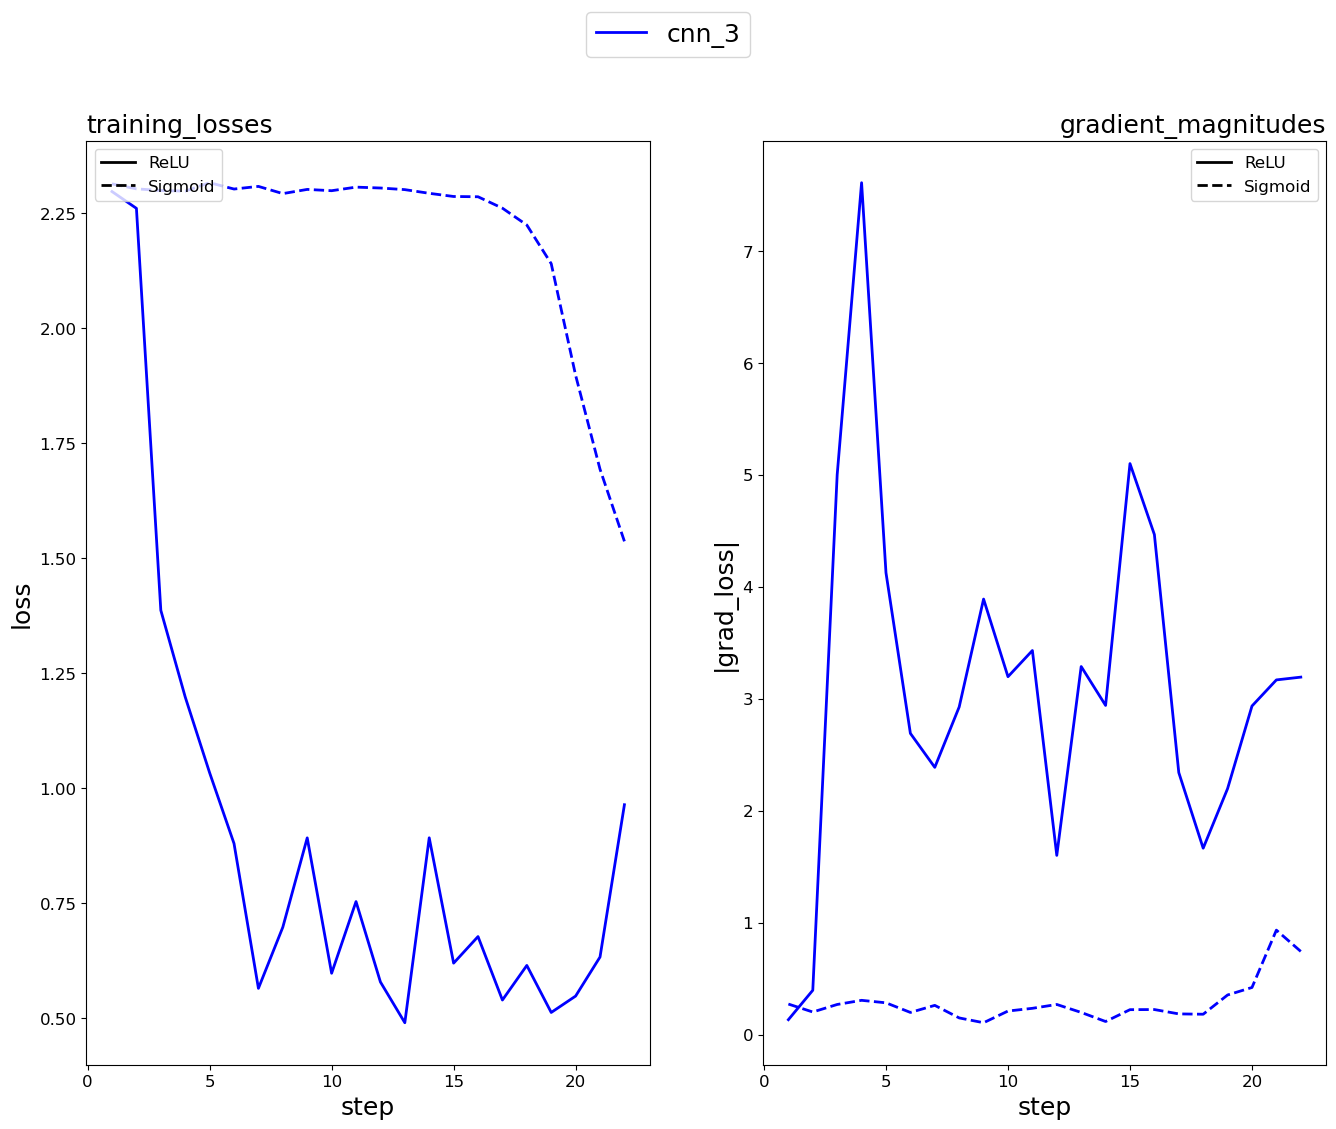

FileNotFoundError: [Errno 2] No such file or directory: '/content/architecture_results\\ol.png'

In [74]:
results = [cnn_3]
part4Plots(results, save_dir='/content/architecture_results', filename='ol', show_plot=True)

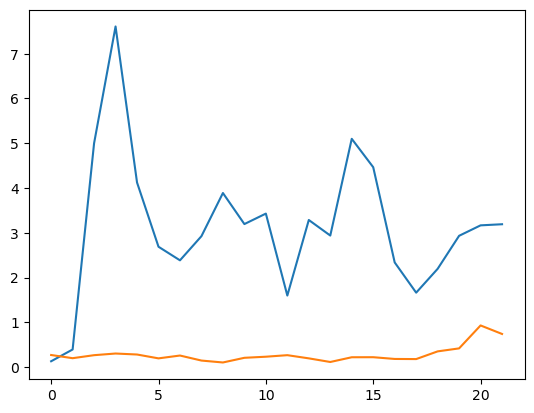

In [75]:
plt.plot(relu_grad_curve)
plt.plot(sigmoid_grad_curve)

## 5.0 Experimenting Learning Rate

Necessary Methods

In [76]:
def train(dataloader, model, loss_fn, optimizer, valloader, training_loss, validation_accuracy):
    size = int(len(dataloader.dataset)*0.9)


    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        model.train()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        num_batches = len(dataloader)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            test_loss, correct = 0, 0
            loss, current = loss.item(), (batch) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

            training_loss.append(loss)
            validation_accuracy.append(val_test(valloader, model, loss_fn))


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return correct
def val_test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)*0.1

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).sum().item()  # Calculate correct predictions
    test_loss /= num_batches
    accuracy = correct / size  # Calculate accuracy
    print(f"Validation error: \n Validation accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return accuracy

Architectures

In [77]:
class mlp_1(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    num_classes = 10
    super(mlp_1, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    relu = self.relu(hidden) #ReLu
    output = self.fc2(relu) #Prediction layer
    return output

class mlp_2(torch.nn.Module):
  def __init__(self):
    input_size = 784
    hidden_size = 32
    hidden2_size = 64
    num_classes = 10
    super(mlp_2, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, hidden2_size)
    self.fc3 = torch.nn.Linear(hidden2_size, num_classes)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x) #FC-32
    relu = self.relu(hidden) #ReLu
    hidden2 = self.fc2(relu) #FC-64
    output = self.fc3(hidden2) #Prediction layer
    return output

class cnn_3(torch.nn.Module):
  def __init__(self):
    super(cnn_3, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(16, 8, (5, 5), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn3(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_4(torch.nn.Module):
  def __init__(self):
    super(cnn_4, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn3 = torch.nn.Conv2d(8, 16, (5, 5), stride=1, padding='valid')
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn4 = torch.nn.Conv2d(16, 16, (5, 5), stride=1, padding='valid')
    self.relu = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(144, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.cnn3(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn4(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

class cnn_5(torch.nn.Module):
  def __init__(self):
    super(cnn_5, self).__init__()
    self.cnn1 = torch.nn.Conv2d(1, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn2 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn3 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn4 = torch.nn.Conv2d(8, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.cnn5 = torch.nn.Conv2d(16, 16, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.cnn6 = torch.nn.Conv2d(16, 8, (3, 3), stride=1, padding="valid")
    self.relu = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d((2, 2), stride=2)
    self.fc1 = torch.nn.Linear(8*3*3, 10)  # Assuming the feature map size is 4x4 after pooling
  def forward(self, x):
    x = self.cnn1(x)
    x = self.relu(x)
    x = self.cnn2(x)
    x = self.relu(x)
    x = self.cnn3(x)
    x = self.relu(x)
    x = self.cnn4(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.cnn5(x)
    x = self.relu(x)
    x = self.cnn6(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output

Model declaration and training

In [78]:
model = cnn_4().to(device) #initialize model

loss = torch.nn.CrossEntropyLoss()
print(model, "\n")

cnn_4(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (relu): ReLU()
  (cnn2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (cnn3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=valid)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn4): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=valid)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=144, out_features=10, bias=True)
) 



initialize model once but re initialize optimizer with different learning rates to observe its effect

In [88]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.0)

In [89]:
acc_scheduled = []

In [90]:
loss_001 = []

epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_generator, model, loss, optimizer, val_generator, loss_001, acc_scheduled)
    test_accuracy = test(test_generator, model, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 0.374105  [    0/54000]
Validation error: 
 Validation accuracy: 88.2%, Avg loss: 0.326954 

loss: 0.471548  [ 5000/54000]
Validation error: 
 Validation accuracy: 88.1%, Avg loss: 0.326192 

loss: 0.492895  [10000/54000]
Validation error: 
 Validation accuracy: 88.1%, Avg loss: 0.326048 

loss: 0.373353  [15000/54000]
Validation error: 
 Validation accuracy: 88.2%, Avg loss: 0.325972 

loss: 0.302935  [20000/54000]
Validation error: 
 Validation accuracy: 88.2%, Avg loss: 0.325644 

loss: 0.360818  [25000/54000]
Validation error: 
 Validation accuracy: 88.2%, Avg loss: 0.325473 

loss: 0.256932  [30000/54000]
Validation error: 
 Validation accuracy: 88.1%, Avg loss: 0.325359 

loss: 0.400322  [35000/54000]
Validation error: 
 Validation accuracy: 88.1%, Avg loss: 0.325684 

loss: 0.274123  [40000/54000]
Validation error: 
 Validation accuracy: 88.2%, Avg loss: 0.325529 

loss: 0.356741  [45000/54000]
Validation error: 
 Validation accuracy

In [ ]:
#dictionary definition
cnn_4_dict = {
    "name": 'cnn_4',
    "loss_curve_1": loss_1,
    "loss_curve_01": loss_01,
    "loss_curve_001": loss_001,
    "val_acc_curve_1": acc_1,
    "val_acc_curve_01": acc_01,
    "val_acc_curve_001": acc_001,

}